# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [12]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


In [13]:
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
    
    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))
    
    return inter/union

In [15]:
d1 = "Think like a man of action act like man of thought."
d2 = "Try not to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, or give me death"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d2, d3))
print(jaccard_similarity(d1, d3))


0.23529411764705882
0.0
0.0


In [16]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[1], tfidf[2]))
print(cosine_similarity(tfidf[0], tfidf[2]))

[[0.28000404]]
[[0.]]
[[0.]]


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\U

## 한국어 형태소 분석기 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [20]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [21]:
# decode해서 한글데이터 가져오기
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])
    
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [22]:
from konlpy.tag import Mecab

tagger = Mecab(dicpath = r"C:/mecab/mecab-ko-dic")
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [24]:
#!pip install gensim

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [25]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [26]:
word2vec = Word2Vec(reviews, min_count = 5)
word2vec

In [31]:
word2vec.wv.most_similar('영화')

[('작품', 0.9306684136390686),
 ('듯', 0.9223523736000061),
 ('마음', 0.8943416476249695),
 ('따뜻', 0.8930622935295105),
 ('이야기', 0.8921220898628235),
 ('내', 0.8874578475952148),
 ('일깨워', 0.8872401118278503),
 ('모습', 0.8833035826683044),
 ('가슴', 0.8825027346611023),
 ('표현', 0.878079891204834)]

* t-sne을 이용한 단어 벡터 시각화

In [32]:
tsne = TSNE(n_components = 2)
tsne

TSNE()

In [42]:
vocab = list(word2vec.wv.index_to_key)
similarity = word2vec.wv[vocab]   ## gensim 4.x 부터는 모델 뒤에 '.wv' 
similarity

array([[-2.7221537e-01,  5.2897406e-01, -1.5431195e-01, ...,
        -1.9589262e-01, -3.6518142e-02, -2.6002181e-01],
       [-1.2190519e-01,  3.9067611e-01, -2.8088313e-01, ...,
        -7.0038325e-01,  7.6702093e-03, -3.3723065e-01],
       [ 1.0145474e-01,  2.2787115e-01, -2.9012498e-01, ...,
        -6.4983350e-01,  4.5964491e-01, -4.0711927e-01],
       ...,
       [ 4.6673170e-03,  2.7373202e-02, -5.5154338e-03, ...,
        -6.0216878e-02,  4.1486353e-02, -9.0866918e-03],
       [-1.2546114e-02,  2.6780844e-02, -3.2374712e-03, ...,
        -2.8449949e-02,  3.5141006e-02, -3.2268405e-02],
       [ 5.9911911e-03,  4.0038675e-02,  6.4709509e-04, ...,
        -2.7139224e-02,  2.2927377e-02, -1.9056937e-02]], dtype=float32)

In [43]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index = vocab, columns = ['x', 'y'])
df[0:10]

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,x,y
.,-12.460782,53.327038
이,2.182304,51.976624
는,4.577684,49.695869
영화,-0.967939,49.091206
다,-13.114775,63.918777
고,-3.335862,62.044052
의,5.139578,45.783562
하,0.929981,60.391106
을,4.857840,49.648785
에,2.657924,45.338501


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


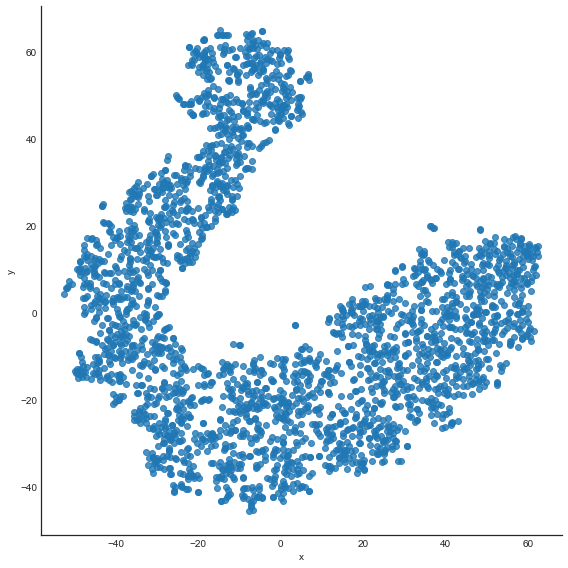

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data = df, fit_reg = False, size = 8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [48]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
predict = ward.fit_predict(df)
predict

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [49]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
.,-12.460782,53.327038,3
이,2.182304,51.976624,3
는,4.577684,49.695869,3
영화,-0.967939,49.091206,3
다,-13.114775,63.918777,3
고,-3.335862,62.044052,3
의,5.139578,45.783562,3
하,0.929981,60.391106,3
을,4.857840,49.648785,3
에,2.657924,45.338501,3


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


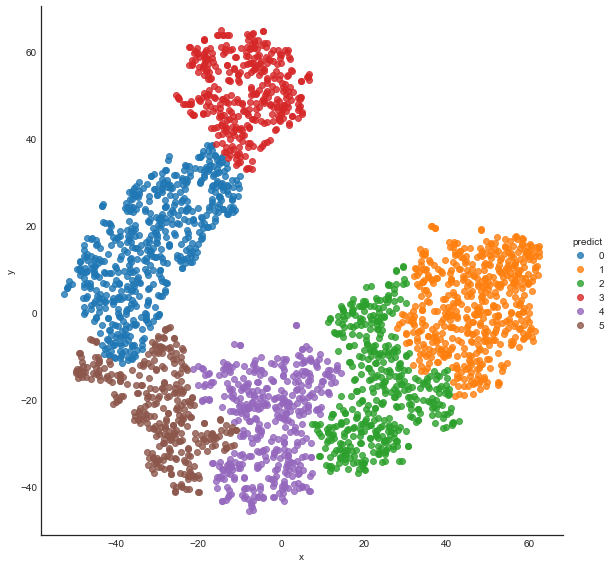

In [51]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### average

In [52]:
avg = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
predict = avg.fit_predict(df)
predict

array([4, 4, 4, ..., 0, 0, 0], dtype=int64)

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


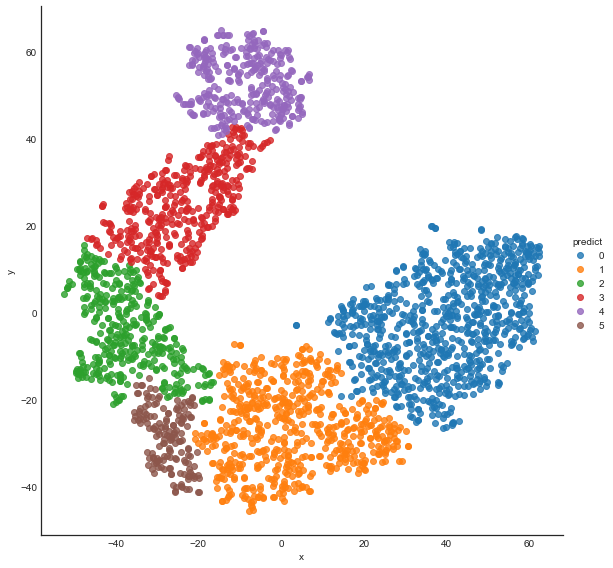

In [53]:
results = df
results['predict'] = predict
results[0:10]

sns.lmplot('x', 'y', data = results, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### complete'

In [59]:
compl = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
predict =  compl.fit_predict(df)
predict

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


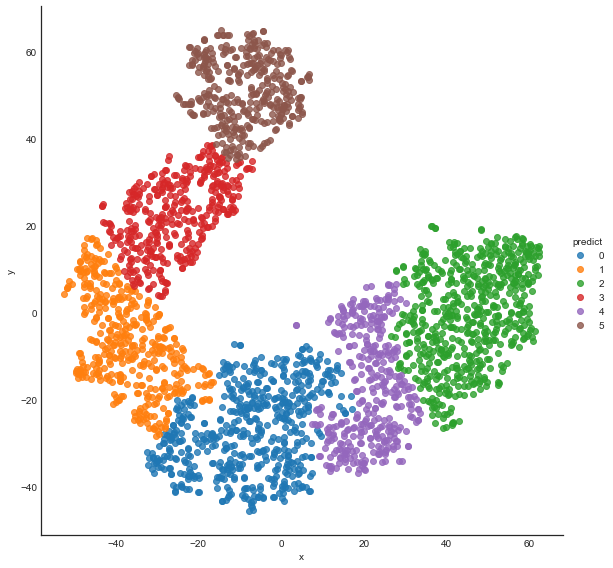

In [60]:
results = df
results['predict'] = predict
results[0:10]

sns.lmplot('x', 'y', data = results, fit_reg = False, size = 8, hue = 'predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교
* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [64]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,14.705223,17.421099,12.248581,10.611911,12.619450,19.148805,15.139801,17.704920,17.099473,...,58.894419,87.885563,85.184583,69.340091,86.299985,80.840416,80.675819,92.643148,92.588461,85.150563
1,14.705223,0.000000,3.307520,4.271962,19.406588,11.480560,6.862907,8.507163,3.546453,6.655140,...,52.392535,81.727238,79.915884,61.714308,77.082842,69.867145,69.869661,80.970281,80.615859,72.860595
2,17.421099,3.307520,0.000000,5.578490,22.700533,14.666350,3.952452,11.300169,0.284085,4.761527,...,49.633615,78.926706,77.248164,58.762715,73.928157,66.590386,66.601436,77.667544,77.310730,69.558197
3,12.248581,4.271962,5.578490,0.000000,19.167747,13.167509,6.945666,11.458178,5.852400,5.218206,...,50.492236,79.838161,77.762205,60.230993,76.232330,69.751099,69.675716,81.214567,81.016088,73.426200
4,10.611911,19.406588,22.700533,19.167747,0.000000,9.956994,25.731449,14.481009,22.948803,24.372211,...,68.719297,97.901584,95.387916,78.882271,95.281758,88.879098,88.817273,100.222651,99.935234,92.224258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,80.840416,69.867145,66.590386,69.751099,88.879098,81.175096,63.225652,77.297317,66.378572,64.539632,...,31.692899,33.995488,37.937704,23.087568,14.395699,0.000000,1.273993,12.957614,14.280099,11.895681
2635,80.675819,69.869661,66.601436,69.675716,88.817273,81.208661,63.196750,77.370300,66.393282,64.467589,...,30.802404,32.737780,36.665859,21.990346,13.257454,1.273993,0.000000,13.710778,15.211347,13.153890
2636,92.643148,80.970281,77.667544,81.214567,100.222651,92.076285,74.508430,88.007063,77.438923,76.009183,...,44.454158,41.283749,46.241360,35.123805,20.738920,12.957614,13.710778,0.000000,2.976514,9.859307
2637,92.588461,80.615859,77.310730,81.016088,99.935234,91.616624,74.246518,87.481396,77.075847,75.826065,...,45.953370,44.063759,48.936483,37.017262,23.450039,14.280099,15.211347,2.976514,0.000000,8.245272


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

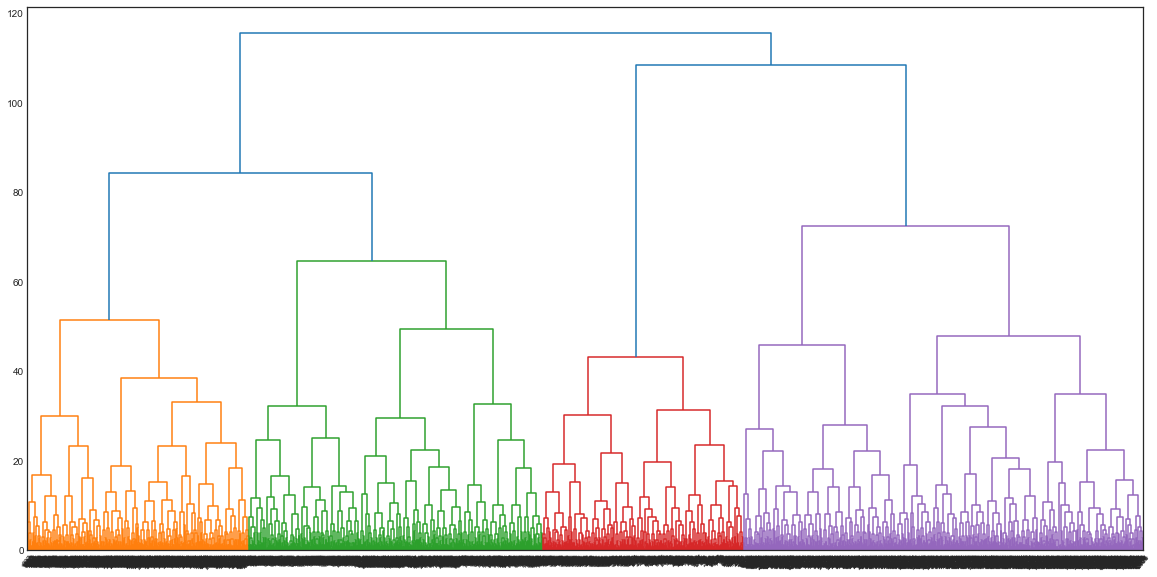

In [65]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(Z = row_clusters,
          leaf_rotation = 50,
          leaf_font_size = 7)

plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

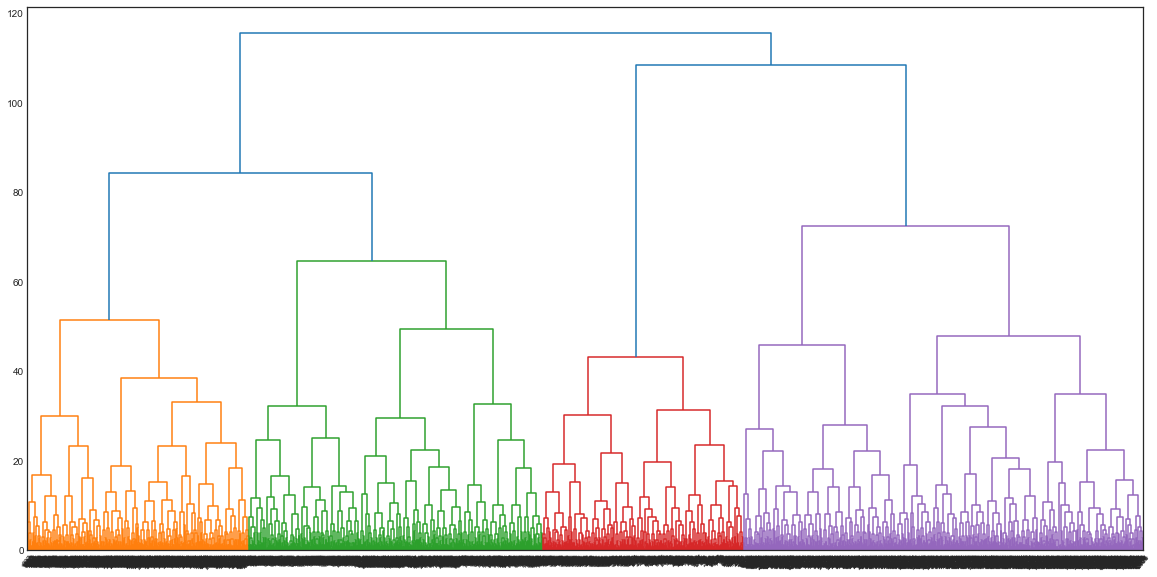

In [66]:
mm = linkage(df, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(Z = mm,
          leaf_rotation = 50,
          leaf_font_size = 7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요
* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 0, 0, 0])

In [68]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
.,-12.460782,53.327038,1
이,2.182304,51.976624,1
는,4.577684,49.695869,1
영화,-0.967939,49.091206,1
다,-13.114775,63.918777,1
고,-3.335862,62.044052,1
의,5.139578,45.783562,1
하,0.929981,60.391106,1
을,4.857840,49.648785,1
에,2.657924,45.338501,1


C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


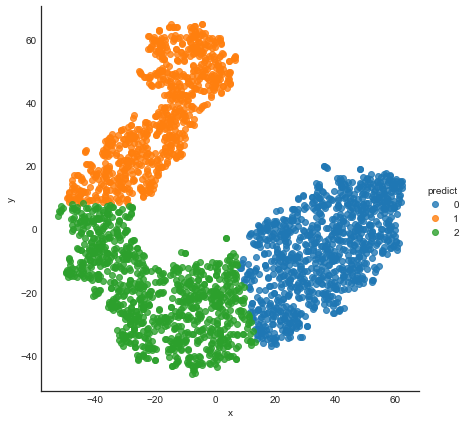

In [69]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 6, hue = 'predict')
plt.show()

### 클러스터 개수 6

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\nlp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


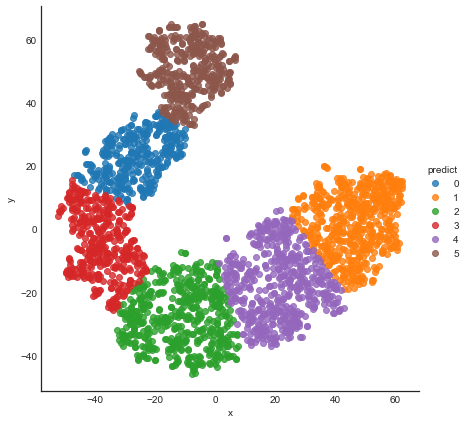

In [71]:
kmeans = KMeans(n_clusters = 6)
predict = kmeans.fit_predict(df)

results = df.copy()
results['predict'] = predict
results[0:10]

sns.lmplot('x', 'y', data = results, fit_reg = False, size = 6, hue = 'predict')
plt.show()